In [1]:
pip install beautifulsoup4 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from bs4 import BeautifulSoup
import requests

In [4]:
import json
import time

In [5]:
i = 1
page = requests.get(f'https://www.banki.ru/insurance/responses/list/?is_countable=on&page={i}&isMobile=0')
with open ('banks_all_pages11.json', 'a+', encoding="utf-8") as file:
    while (page.status_code == 200):
        content = page.text
        soup = BeautifulSoup(content, "lxml")
        #поиск всех тегов "article" с классом "responses__item" в HTML-контенте
        allfd = soup.find_all('article', class_="responses__item")

        # воспользуемся циклом, чтобы получить все необходимые ссылки
        links = []
        for href in allfd:
            links.append(href.find('a', href=True)['href'])
        
        #Пройдёмся по каждой ссылке в цикле и сохраним информацию 
        for link in links:
            result = requests.get(f'{root}{link}')
            if (page.status_code == 200):
                content = result.text
                soup = BeautifulSoup(content, 'lxml')
                comp = soup.find('div', class_='header-h2 display-inline margin-right-x-small').get_text(strip=True, separator=' ')
                mark = soup.find('div', class_='flexbox flexbox--inline flexbox--row flexbox--gap_xsmall flexbox--align-items_baseline').get_text(strip=True, separator=' ')
                fd = soup.find('div', class_='article-text response-page__text markup-inside-small markup-inside-small--bullet').get_text(strip=True, separator=' ')
                title = soup.find('h1').get_text(strip=True, separator=' ')
                json.dump({'company': comp, 'mark': mark,'title': title,'review': fd}, file, ensure_ascii=False, indent=4)
        i += 1
        if i>=40:
            break
        page = requests.get(f'https://www.banki.ru/insurance/responses/list/?is_countable=on&page={i}&isMobile=0')

NameError: name 'root' is not defined

In [1]:
import pandas as pd
import json

In [2]:
#открываем json затем с помощью pandas переводим его в DataFrame
with open("C:/Users/denis/Desktop/1/banks_all_pages11.json", 'r', encoding='utf-8-sig') as datafile:
        data = json.load(datafile)
df = pd.DataFrame(data)

In [3]:
#размер датасета
df.shape

(928, 4)

In [4]:
df.head()

,company,mark,title,review
0,ВСК,Оценка: 3,Проблема с выбором СТОА,"С начала августа не могу получить направление,..."
1,ВСК,Оценка: 1,Обманным путем оформили договор без самого дог...,Добрый день. 27.08.2023 я оформила кредит в М....
2,Тинькофф Страхование,Оценка: 1,Страхование задолженности при потере работы,Добрый день! Моя кредитная карта Тинькофф Блэк...
3,Тинькофф Страхование,Оценка: 1,"Прождал больше недели, никто не перезвонил",Добрый вечер. Больше недели назад обратился за...
4,Тинькофф Страхование,Оценка: 2,Передача события от менеджера к менеджеру. Нев...,Попал в ДТП не по своей вине. Заполнил заявку ...


In [5]:
 import re

In [6]:
#функция, которая оставляет только оценку (цифру)
def only_num(x):
    x = re.sub('\D', '', x)
    return x[0]

In [7]:
df['mark'] = df['mark'].apply(only_num)

In [8]:
df

,company,mark,title,review
0,ВСК,3,Проблема с выбором СТОА,"С начала августа не могу получить направление,..."
1,ВСК,1,Обманным путем оформили договор без самого дог...,Добрый день. 27.08.2023 я оформила кредит в М....
2,Тинькофф Страхование,1,Страхование задолженности при потере работы,Добрый день! Моя кредитная карта Тинькофф Блэк...
3,Тинькофф Страхование,1,"Прождал больше недели, никто не перезвонил",Добрый вечер. Больше недели назад обратился за...
4,Тинькофф Страхование,2,Передача события от менеджера к менеджеру. Нев...,Попал в ДТП не по своей вине. Заполнил заявку ...
...,...,...,...,...
923,Тинькофф Страхование,5,Выплата после ДТП,Добрый день. Хотельбы написать отзыв о тинькоф...
924,АльфаСтрахование,1,Невозможно оформить полис,"Пытаюсь оформить полис ОСАГО, при расчёте стои..."
925,Совкомбанк Страхование,5,Совкомбанк Страхование,"Потребовалось изменить полис Осаго, необходимо..."
926,Сбербанк страхование жизни,1,Не могу разорвать договор и вернуть деньги по ...,"В 2018 году, обманув про условия расторжения д..."


In [9]:
#нулевых значений нет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  928 non-null    object
 1   mark     928 non-null    object
 2   title    928 non-null    object
 3   review   928 non-null    object
dtypes: object(4)
memory usage: 29.1+ KB


In [10]:
df['company'] = df['company'].astype(str)
df['title'] = df['title'].astype(str)
df['review'] = df['review'].astype(str)
df['mark'] = df['mark'].astype(int)

In [11]:
import seaborn as sns

In [12]:
df['mark'].value_counts()

1    435
5    422
2     42
3     22
4      7
Name: mark, dtype: int64

Больше всего отзывов с оценкой 5 или 1. 

[Text(0, 0.5, 'количество отзывов')]

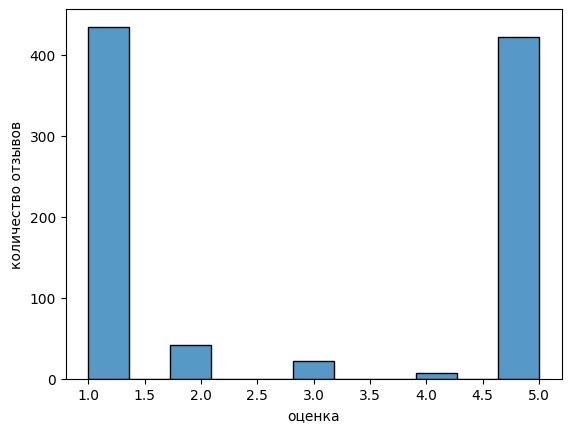

In [13]:
axx = sns.histplot(data=df, x="mark")
axx.set(xlabel='оценка')
axx.set(ylabel='количество отзывов')

In [14]:
df['company'].value_counts()
comp = df['company'].unique()

In [15]:
comp_mark = {}

In [16]:
for company in comp[:5]:
    comp_mark[company] = df[df['company'] == company]['mark'].mean()

[Text(0.5, 0, 'Компании'), Text(0.5, 1.0, 'средняя оценка')]

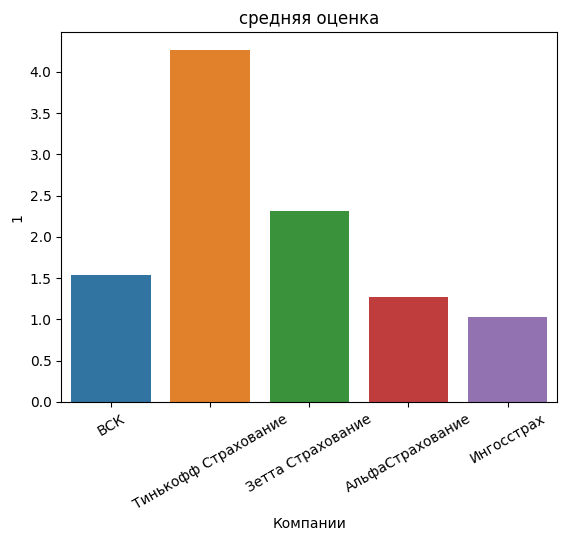

In [21]:
my_df = pd.DataFrame(comp_mark.items())
ax = sns.barplot(x=0, y=1, data=my_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set(xlabel = 'Компании',  title='средняя оценка')

Проведем анализ оценок топовых банков:

[Text(0, 0.5, 'количество отзывов')]

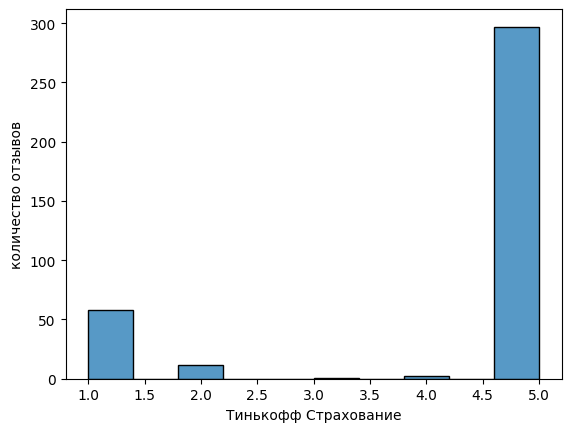

In [18]:
ax = sns.histplot(data=df[df['company'] == 'Тинькофф Страхование'], x="mark" )
ax.set(xlabel='Тинькофф Страхование')
ax.set(ylabel='количество отзывов')

[Text(0, 0.5, 'количество отзывов')]

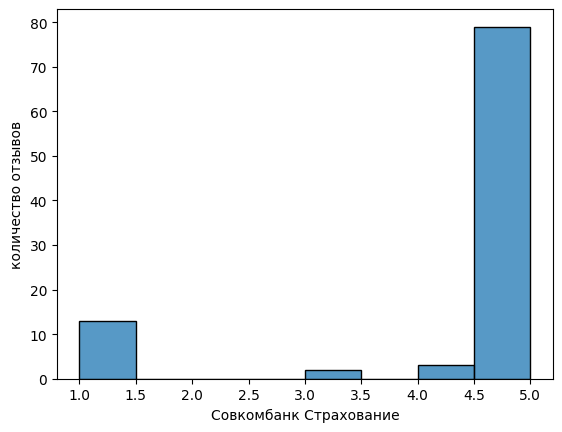

In [19]:
ax1 = sns.histplot(data=df[df['company'] == 'Совкомбанк Страхование'], x="mark")
ax1.set(xlabel='Совкомбанк Страхование')
ax1.set(ylabel='количество отзывов')

[Text(0, 0.5, 'количество отзывов')]

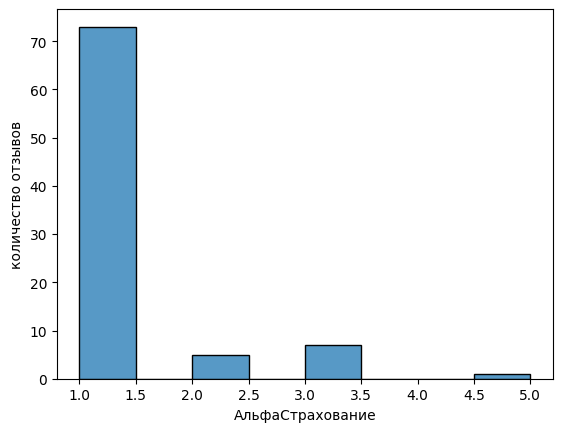

In [20]:
ax2 = sns.histplot(data=df[df['company'] == 'АльфаСтрахование'], x="mark")
ax2.set(xlabel='АльфаСтрахование')
ax2.set(ylabel='количество отзывов')

In [21]:
df['review'] = df['company']+' '+df['title']+' '+df['review']
df = df.drop(columns=['company', 'title'])
df

,mark,review
0,3,ВСК Проблема с выбором СТОА С начала августа н...
1,1,ВСК Обманным путем оформили договор без самого...
2,1,Тинькофф Страхование Страхование задолженности...
3,1,"Тинькофф Страхование Прождал больше недели, ни..."
4,2,Тинькофф Страхование Передача события от менед...
...,...,...
923,5,Тинькофф Страхование Выплата после ДТП Добрый ...
924,1,АльфаСтрахование Невозможно оформить полис Пыт...
925,5,Совкомбанк Страхование Совкомбанк Страхование ...
926,1,Сбербанк страхование жизни Не могу разорвать д...


In [22]:

from nltk.corpus import stopwords

In [23]:
df['review'] = df['review'].str.replace(r"\([^()]*\)", " ", regex=True).str.replace(r'[^\w\s]+', ' ',regex=True).str.lower()

In [24]:
df

,mark,review
0,3,вск проблема с выбором стоа с начала августа н...
1,1,вск обманным путем оформили договор без самого...
2,1,тинькофф страхование страхование задолженности...
3,1,тинькофф страхование прождал больше недели ни...
4,2,тинькофф страхование передача события от менед...
...,...,...
923,5,тинькофф страхование выплата после дтп добрый ...
924,1,альфастрахование невозможно оформить полис пыт...
925,5,совкомбанк страхование совкомбанк страхование ...
926,1,сбербанк страхование жизни не могу разорвать д...


In [25]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('russian'))

In [26]:
def stop_words_delete(text):
    filtered_sentence = ''
    for w in text.split(): 
        if w not in stop_words: 
            filtered_sentence += ' '+w
    return filtered_sentence

In [27]:
df['review'] = df['review'].apply(stop_words_delete)

In [28]:
df

,mark,review
0,3,вск проблема выбором стоа начала августа могу...
1,1,вск обманным путем оформили договор самого до...
2,1,тинькофф страхование страхование задолженност...
3,1,тинькофф страхование прождал недели никто пер...
4,2,тинькофф страхование передача события менедже...
...,...,...
923,5,тинькофф страхование выплата дтп добрый день ...
924,1,альфастрахование невозможно оформить полис пы...
925,5,совкомбанк страхование совкомбанк страхование...
926,1,сбербанк страхование жизни могу разорвать дог...


In [29]:
import matplotlib.pyplot as plt

Посмотрим равенство классов:

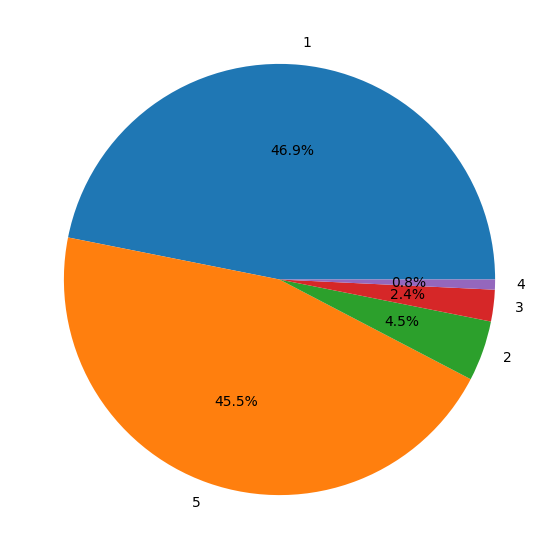

In [30]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df['mark'].value_counts(), labels=df['mark'].value_counts().index, autopct='%1.1f%%')
 
# show plot
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df['review']
y = df['mark']

Попробуем убрать разбалансировку классов

In [33]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy="not majority")

oversampled_data, oversampled_target = oversampler.fit_resample(X.values.reshape(-1,1), y.values.reshape(-1,1))

oversampled_data.shape

(2175, 1)

In [34]:
pd.Series(oversampled_target).value_counts()

3    435
1    435
2    435
5    435
4    435
dtype: int64

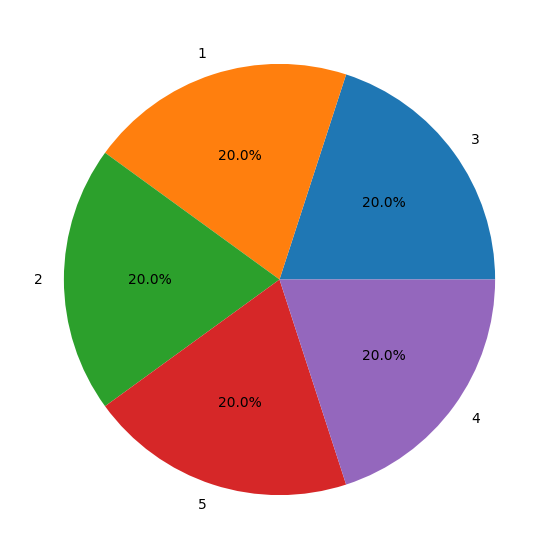

In [35]:
fig = plt.figure(figsize =(10, 7))
plt.pie(pd.Series(oversampled_target).value_counts(), labels=pd.Series(oversampled_target).value_counts().index, autopct='%1.1f%%')
 
# show plot
plt.show()

Приступим к обучению нашей модели:

In [37]:
X_train, X_test, y_train, y_test = train_test_split(oversampled_data, oversampled_target, test_size=0.3, random_state=42)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [110]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.ravel())
X_test_tfidf = tfidf_vectorizer.transform(X_test.ravel())


In [139]:
import time
start_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))
# Обучение модели классификации
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, pd.DataFrame(y_train))

# Предсказание категорий для тестовых данных
y_pred = classifier.predict(X_test_tfidf)

# Оценка точности модели
accuracy_MNB = accuracy_score(pd.DataFrame(y_test), pd.DataFrame(y_pred))
print("Модель MultinomialNB:")
print(metrics.classification_report(y_test, y_pred))

time_MNB = time.time() - start_time

--- 0.0 seconds ---
Модель MultinomialNB:
              precision    recall  f1-score   support

           1       0.99      0.52      0.68       143
           2       0.73      1.00      0.85       119
           3       0.87      1.00      0.93       129
           4       0.96      1.00      0.98       139
           5       0.95      0.95      0.95       123

    accuracy                           0.89       653
   macro avg       0.90      0.89      0.88       653
weighted avg       0.91      0.89      0.87       653



c:\Users\denis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
import time
start_time = time.time()

classifier = MLPClassifier()
classifier.fit(X_train_tfidf, pd.DataFrame(y_train))

# Предсказание категорий для тестовых данных
y_pred = classifier.predict(X_test_tfidf)

# Оценка точности модели
accuracy_MLPC = accuracy_score(pd.DataFrame(y_test), pd.DataFrame(y_pred))
print("Модель MLPClassifier:")
print(metrics.classification_report(y_test, y_pred))

time_MLPC = time.time() - start_time

c:\Users\denis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Модель MLPClassifier:
              precision    recall  f1-score   support

           1       0.98      0.94      0.96       143
           2       1.00      1.00      1.00       119
           3       0.99      1.00      1.00       129
           4       1.00      1.00      1.00       139
           5       0.94      0.98      0.96       123

    accuracy                           0.98       653
   macro avg       0.98      0.98      0.98       653
weighted avg       0.98      0.98      0.98       653



In [90]:
from catboost import CatBoostClassifier
import time

start_time = time.time()

classifier = CatBoostClassifier(
    iterations=300,
    random_seed=43,
    loss_function='MultiClass'
)
classifier.fit(X_train_tfidf, pd.DataFrame(y_train))

# Предсказание категорий для тестовых данных
y_pred = classifier.predict(X_test_tfidf)

# Оценка точности модели
accuracy_cat = accuracy_score(pd.DataFrame(y_test), pd.DataFrame(y_pred))
print("Модель CatBoostClassifier:")
print(metrics.classification_report(y_test, y_pred))

time_cat = time.time() - start_time

Learning rate set to 0.223593
0:	learn: 1.4012163	total: 84.2ms	remaining: 25.2s
1:	learn: 1.2615895	total: 163ms	remaining: 24.3s
2:	learn: 1.1354875	total: 249ms	remaining: 24.6s
3:	learn: 1.0798645	total: 338ms	remaining: 25s
4:	learn: 1.0383813	total: 427ms	remaining: 25.2s
5:	learn: 0.9812037	total: 517ms	remaining: 25.3s
6:	learn: 0.9295078	total: 609ms	remaining: 25.5s
7:	learn: 0.8883244	total: 698ms	remaining: 25.5s
8:	learn: 0.8500177	total: 791ms	remaining: 25.6s
9:	learn: 0.8143041	total: 881ms	remaining: 25.6s
10:	learn: 0.7743198	total: 969ms	remaining: 25.5s
11:	learn: 0.7393267	total: 1.06s	remaining: 25.4s
12:	learn: 0.7144601	total: 1.14s	remaining: 25.2s
13:	learn: 0.6825898	total: 1.22s	remaining: 25s
14:	learn: 0.6578315	total: 1.3s	remaining: 24.7s
15:	learn: 0.6410693	total: 1.39s	remaining: 24.7s
16:	learn: 0.6287535	total: 1.48s	remaining: 24.6s
17:	learn: 0.6011611	total: 1.58s	remaining: 24.7s
18:	learn: 0.5811846	total: 1.67s	remaining: 24.7s
19:	learn: 0.55

In [91]:
from sklearn.ensemble import RandomForestClassifier

import time
start_time = time.time()

classifier = RandomForestClassifier()
classifier.fit(X_train_tfidf, pd.DataFrame(y_train))

# Предсказание категорий для тестовых данных
y_pred = classifier.predict(X_test_tfidf)

# Оценка точности модели
accuracy_rfc = accuracy_score(pd.DataFrame(y_test), pd.DataFrame(y_pred))
print("Модель RandomForestClassifier:")
print(metrics.classification_report(y_test, y_pred))

time_rfc = time.time() - start_time

C:\Users\denis\AppData\Local\Temp\ipykernel_5060\3030477162.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train_tfidf, pd.DataFrame(y_train))


Модель RandomForestClassifier:
              precision    recall  f1-score   support

           1       0.98      0.84      0.91       143
           2       1.00      1.00      1.00       119
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       139
           5       0.84      0.98      0.91       123

    accuracy                           0.96       653
   macro avg       0.96      0.96      0.96       653
weighted avg       0.97      0.96      0.96       653



In [99]:
runtimes = [time_MLPC, time_MNB, time_rfc, time_cat]
scores = [accuracy_MLPC, accuracy_MNB, accuracy_rfc, accuracy_cat]
names = ['MLPClassifier', 'MultinomialNB', 'RandomForestClassifier', 'CatBoostClassifier']

results = pd.DataFrame(list(zip(runtimes, scores, names)), columns=['time', 'score', 'Name'])
results

,time,score,Name
0,19.396776,0.981623,MLPClassifier
1,0.007000,0.885145,MultinomialNB
2,0.879000,0.961715,RandomForestClassifier
3,25.448505,0.955590,CatBoostClassifier


Судя по результатам точности моделей, выбор однозначно лучше сделать в сторону MLPClassifier, результаты хорошие и стабильные.\
Если бы нам нужно было в короткое время оценить что-либо с более-менее хорошей точностью, то выбор можно было бы сделать в сторону RandomForestClassifier, он в 20 раз быстрее, при этом точность не намного хуже. 

In [140]:
def predict(text):
    text_tf = tfidf_vectorizer.transform(text)
    print('Оценка: ',int(classifier.predict(text_tf)))

In [141]:
predict(['мне все понравилось очень быстро реагировали'])

Оценка:  5


In [151]:
predict([' выплаты за дтп очень маленькие, не рекомендую, очень долго просидела в очереди, больше сюда не пойду'])

Оценка:  4


In [143]:
predict(['в принципе пользоваться можно, но есть страховые и лучше'])

Оценка:  2


In [154]:
predict(['ужасная страховая, никогда не рекомендовали пользоваться альфастрахованием'])

Оценка:  1
